# Random network

Corresponding to Cahpter 3.2-3.4 in the book [Network Science Book](https://www.networksciencebook.com/) by Albert-László Barabási



In [ ]:
!pip install networkx matplotlib

## Generate random network

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def generate_random_graph_prob(n, p,seed=None):
    """
    Generates a random undirected graph with n nodes.
    Each possible edge is included with probability p.
    Returns a NetworkX Graph object.
    Equivalent to G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
    """
    if seed is not None:
        random.seed(seed)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                G.add_edge(i, j)
    return G

def generate_random_graph_numedge(n, m, seed=None):
    """
    Generates a G(n, m) random undirected graph with n nodes and m edges.
    Each graph with n nodes and m edges is equally likely.
    Equivalent to G = nx.gnm_random_graph(n, m, seed=None, directed=False)
    """
    if seed is not None:
        random.seed(seed)
    
    max_edges = n * (n - 1) // 2
    if m > max_edges:
        raise ValueError(f"Too many edges: For {n} nodes, the maximum number of edges is {max_edges}.")
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    # Generate all possible edges
    all_possible_edges = list(combinations(range(n), 2))
    
    # Randomly sample m edges
    selected_edges = random.sample(all_possible_edges, m)
    
    # Add edges to the graph
    G.add_edges_from(selected_edges)
    
    return G

# Visualize random network

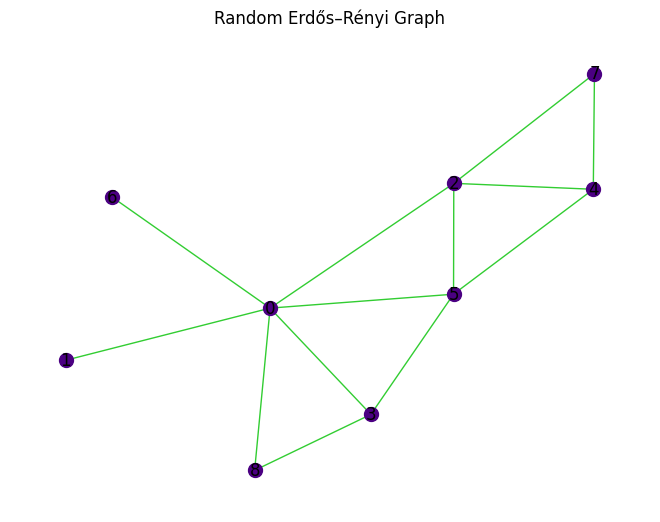

In [8]:
import networkx as nx
import matplotlib.pyplot as plt


# Generate a random Erdős–Rényi graph with 10 nodes and a 0.3 probability of edge creation
G = nx.erdos_renyi_graph(n=9, p=0.3, seed=None, directed=False)
# Draw the graph

nx.draw(G, with_labels=True, node_color='indigo', node_size=100, edge_color='limegreen')

plt.title("Random Erdős–Rényi Graph")
plt.show()

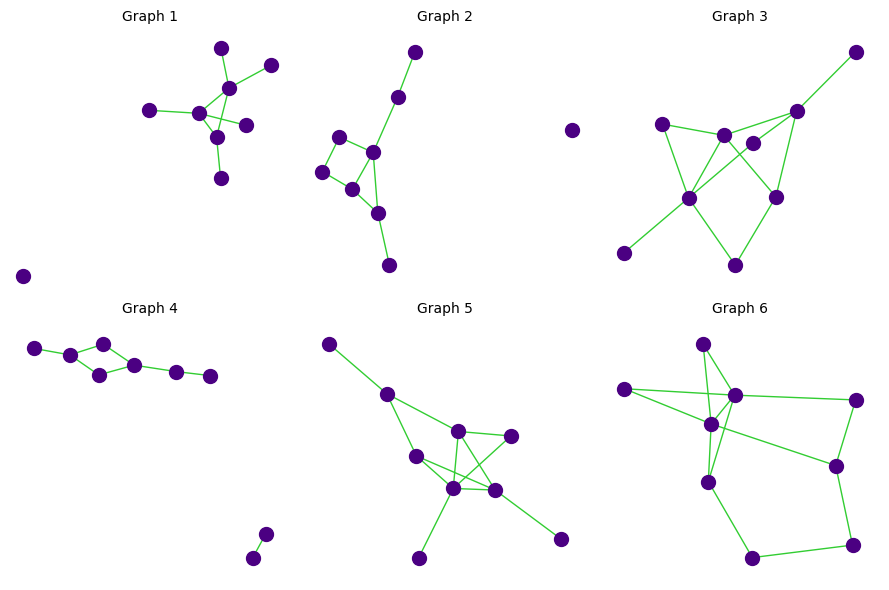

In [9]:
def plot_random_graphs(rows, cols, generator_func, generator_args, layout_func=nx.spring_layout):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        G = generator_func(*generator_args())
        pos = layout_func(G, seed=42)
        ax.set_title(f"Graph {i+1}", fontsize=10)
        nx.draw_networkx_nodes(G, pos, ax=ax, node_size=100, node_color="indigo")
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color="limegreen", width=1)
        ax.set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
plot_random_graphs(
    rows=2, cols=3,
    generator_func=nx.erdos_renyi_graph,
    generator_args=lambda: (9, 0.3)
)

note: the location of nodes in these random networks are purely random and have no meaning

## Degree Distribution

### Binomial Distribution

In a random network the probability that node *i* has exactly *k* links is the product of three terms [15]:

- The probability that $k$ of its links are present, or $p^k$.
- The probability that the remaining $(N - 1 - k)$ links are missing, or $(1 - p)^{N - 1 - k}$.
- The number of ways we can select $k$ links from $N - 1$ potential links a node can have, or  
  $\binom{N - 1}{k}$

Consequently, the degree distribution of a random network follows the binomial distribution:

$$
p_k = \binom{N - 1}{k} p^k (1 - p)^{N - 1 - k} 
$$

The shape of this distribution depends on the system size $N$ and the probability $p$.  

### Poisson Distribution


Most real networks are sparse, meaning that for them $\langle k \rangle \ll N$.  
In this limit, the degree distribution is well approximated by the Poisson distribution:

$$
p_k = e^{-\langle k \rangle} \frac{\langle k \rangle^k}{k!} 
$$

which is often called, the *degree distribution of a random network*.

### Derivation from binomial distribution to Poisson

We start from the **binomial degree distribution** of a random network:

$$
p_k = \binom{N-1}{k} p^k (1 - p)^{N - 1 - k}
$$

Assume:
- $N \to \infty$
- $p \to 0$
- But the average degree $\langle k \rangle = p(N - 1) \approx pN$ remains **finite and constant**

Let $\lambda = \langle k \rangle$, so $p = \lambda / N$ approximately.


For large $N$ and small $k$, we use:

$$
\binom{N-1}{k} \approx \frac{(N-1)^k}{k!} \approx \frac{N^k}{k!}
$$




Substitute $p = \lambda / N$ into each part:

- $p^k = \left(\frac{\lambda}{N}\right)^k$
- $(1 - p)^{N - 1 - k} \approx (1 - \frac{\lambda}{N})^{N} \cdot (1 - \frac{\lambda}{N})^{-1 - k}$

As $N \to \infty$:

$$
\left(1 - \frac{\lambda}{N} \right)^N \to e^{-\lambda}
$$

And $(1 - \frac{\lambda}{N})^{-1-k} \to 1$



$$
p_k \approx \frac{N^k}{k!} \left( \frac{\lambda}{N} \right)^k e^{-\lambda}
= e^{-\lambda} \frac{\lambda^k}{k!}
$$



$$
p_k = e^{-\lambda} \frac{\lambda^k}{k!}
$$

This is the **Poisson distribution**, valid in the limit of large $N$, small $p$, and constant average degree $\lambda = \langle k \rangle$.

It describes the degree distribution of a **sparse random network**.

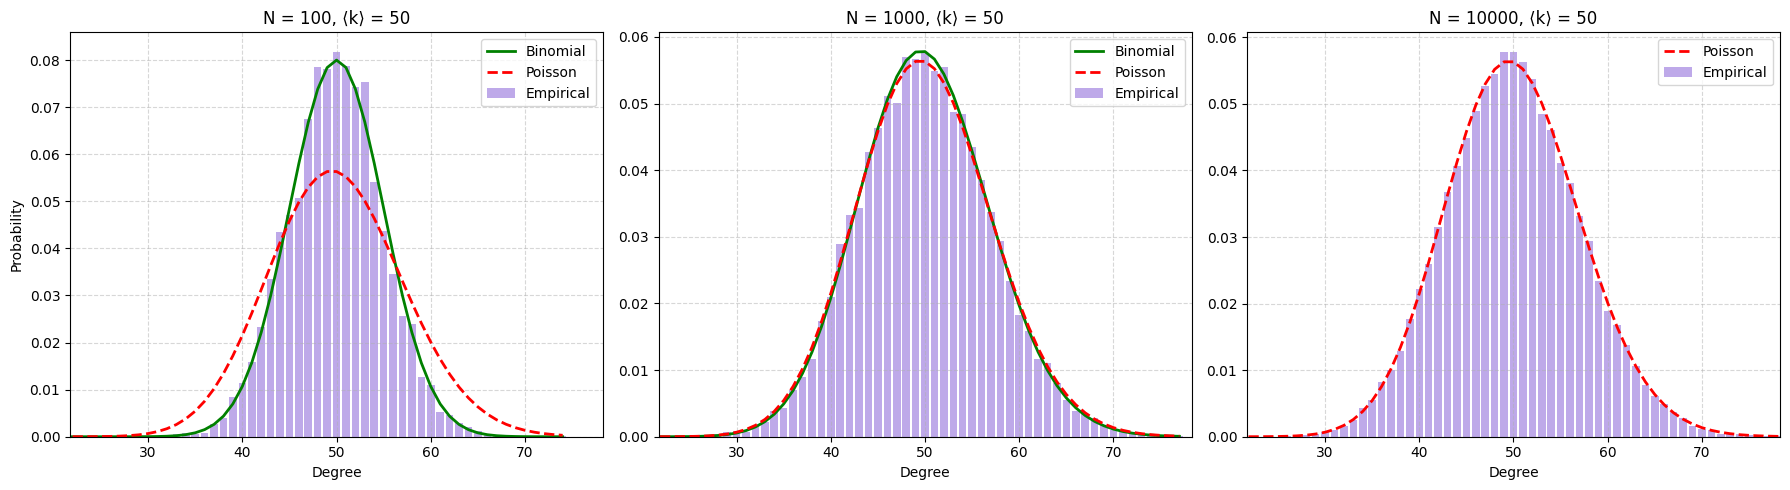

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.stats as stats
import math
def average_degree_distribution_v2(N, k_avg, num_graphs=10):
    p = k_avg / (N - 1)
    max_k = 0
    all_counts = []

    for _ in range(num_graphs):
        G = nx.erdos_renyi_graph(N, p)
        degrees = [d for n, d in G.degree()]
        counts = np.bincount(degrees)
        all_counts.append(counts)
        max_k = max(max_k, len(counts))

    # Pad and average
    for i in range(len(all_counts)):
        if len(all_counts[i]) < max_k:
            all_counts[i] = np.pad(all_counts[i], (0, max_k - len(all_counts[i])))
    avg_counts = np.mean(all_counts, axis=0)
    degree_probs = avg_counts / np.sum(avg_counts)
    k_values = np.arange(len(degree_probs))
    return k_values, degree_probs

def plot_all():
    Ns = [100, 1000, 10000]
    k_avg = 50
    num_graphs_list = [50, 20, 5]  # Reduce for large N

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for idx, (N, num_graphs) in enumerate(zip(Ns, num_graphs_list)):
        ax = axes[idx]
        k_values, degree_probs = average_degree_distribution_v2(N, k_avg, num_graphs)
        p = k_avg / (N - 1)

        # Theoretical distributions
        binom_probs = stats.binom.pmf(k_values, N - 1, p) if N <= 1000 else None
        poisson_probs = stats.poisson.pmf(k_values, mu=k_avg)

        # Plot
        ax.bar(k_values, degree_probs, color='mediumpurple', alpha=0.6, label="Empirical")
        if binom_probs is not None:
            ax.plot(k_values, binom_probs, 'g-', lw=2, label="Binomial")
        ax.plot(k_values, poisson_probs, 'r--', lw=2, label="Poisson")

        ax.set_title(f"N = {N}, ⟨k⟩ = {k_avg}")
        ax.set_xlabel("Degree")
        if idx == 0:
            ax.set_ylabel("Probability")
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_xlim(k_avg - 4 * np.sqrt(k_avg), k_avg + 4 * np.sqrt(k_avg))  # zoom in

    plt.tight_layout()
    plt.show()

plot_all()
